In [22]:
import numpy as np
import pandas as pd
from sklearn.cross_validation import train_test_split, cross_val_score
# from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale, StandardScaler
import tensorflow as tf
from keras.models import Sequential
import keras
from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
from sklearn.grid_search import GridSearchCV
#from sklearn.model_selection import GridSearchCV
from keras.layers import Dense, Activation
from keras.models import Sequential
from keras.datasets import mnist
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, Flatten
from scipy.io import loadmat
import numpy as np
import random as random
from keras import applications
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from sklearn.linear_model import LogisticRegressionCV
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 

In [4]:
# build the VGG16 network
model = applications.VGG16(include_top=False,
                           weights='imagenet')
print model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0         
__________

In [20]:
f = open('annotations/list.txt')
table = pd.DataFrame([x.split() for x in f.readlines() if not x.lstrip().startswith("#")])
picture_name = table[0]
label = table[1]
image_corpus = [image.load_img('images/'+image_name+'.jpg',target_size = (224,224)) for image_name in picture_name]

Show Sample Pictures


/Users/Ruozi/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:1357: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


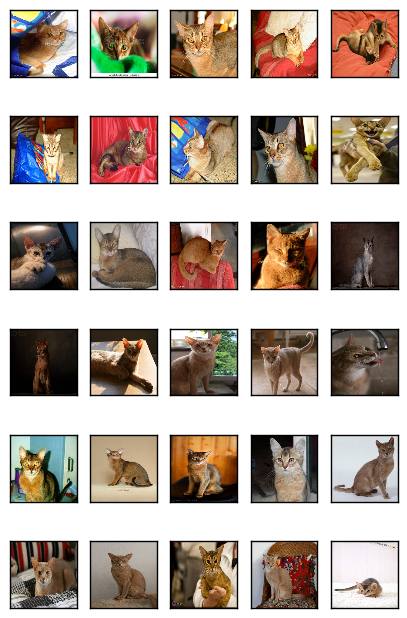

In [23]:
print ('Show Sample Pictures')
matplotlib.use('Agg')
np.set_printoptions(precision=3, suppress=True)
fig, axes = plt.subplots(6, 5, subplot_kw={'xticks': (), 'yticks': ()}, figsize=(5, 8))
for img, ax in zip(image_corpus, axes.ravel()):
    ax.imshow(img)

In [26]:
X = np.array([image.img_to_array(img) for img in image_corpus])
X_pre = preprocess_input(X)
features = model.predict(X_pre)
print features.shape

(7349, 7, 7, 512)


In [27]:
features_ = features.reshape(features.shape[0], -1)
y = np.array(label)
X_train, X_test, y_train, y_test = train_test_split(features_, y, stratify=y)
lr = LogisticRegressionCV().fit(X_train, y_train)
print('logistic regression train score is',lr.score(X_train, y_train))
print('logistic regressiion test score is',lr.score(X_test, y_test))

('logistic regression train score is', 1.0)
('logistic regressiion test score is', 0.85473340587595215)
